## Deep Learning with Pytorch: Part I

Before building a Deep Neural Network (DNN), it is crucial to master some fundamental programming skills. This week, we will cover:
- **Visualizing data using ```Matplotlib```**
- **Saving and loading data using ```scipy.io``` and ```h5py```**
- **Parsing and managing datasets with ```torch.utils.data```**
- **Additional useful techniques (Optional but helpful)**

## (1) Visualizing Data with Matplotlib

Before training a model, it’s essential to visualize the data to understand its structure, distribution, and potential issues. The ```matplotlib``` library is a fundamental tool for plotting in Python.

### (1.1) Basic Plotting Skills
- ```plt.plot()```: Line plots
- ```plt.scatter()```: Scatter plots
- ```plt.imshow()```: Display images

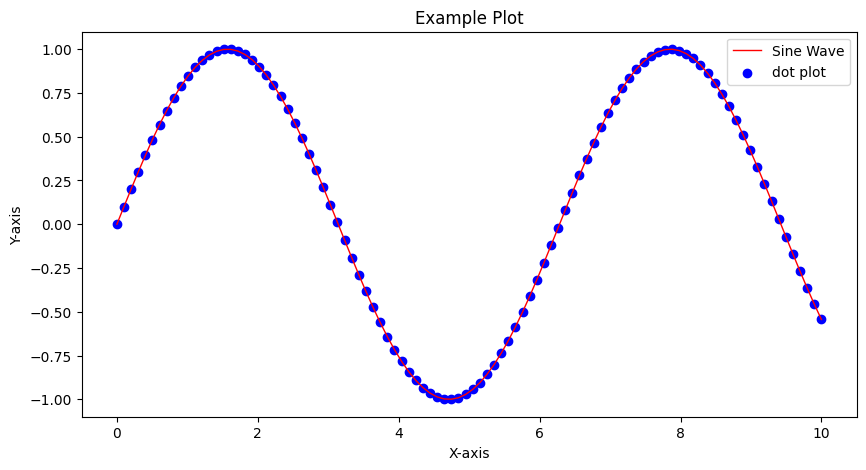

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a simple line plot
plt.figure(figsize=(10,5))
plt.plot(x, y, label="Sine Wave", linewidth=1., color='r') # Plot curves
plt.scatter(x,y, label='dot plot', marker='o', color='b') # Plot dots
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Example Plot")
plt.legend()
plt.show()

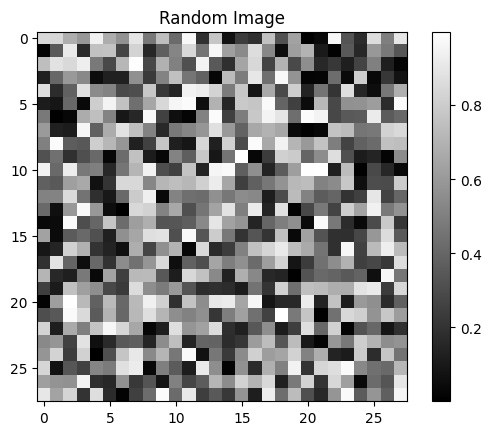

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random grayscale image
image = np.random.rand(28, 28)

plt.imshow(image, cmap='gray') # Plot images
plt.colorbar()
plt.title("Random Image")
plt.show()

### (1.2) Plotting 2D Figures (Contour and Surface Plots)
2D plots help visualize scalar fields and functions of two variables, which is useful for representing loss landscapes, heatmaps, and decision boundaries.

#### (1.2.1) Contour Plots

A contour plot represents a 3D function in 2D by drawing level curves where the function takes the same value.

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3552324344.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Contour Plot of $z=sin(\sqrt{x^2 + y^2})$")


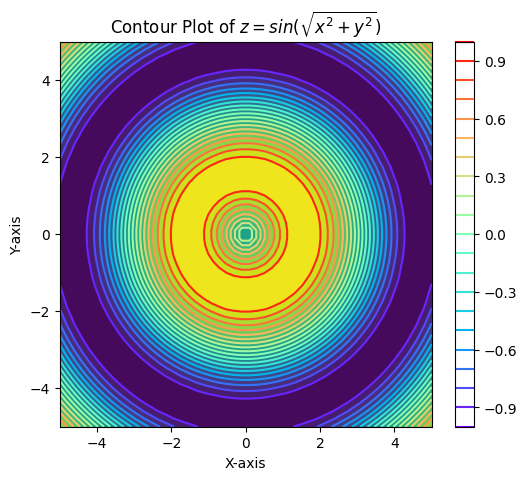

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D function
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot contour map
plt.figure(figsize=(6,5))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis') # filled contours
contour = plt.contour(X, Y, Z, levels=20, cmap='rainbow') # contour lines
plt.colorbar(contour)  # Add color bar
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Contour Plot of $z=sin(\sqrt{x^2 + y^2})$")
plt.show()

### (1.2.2) Surface Plots

A surface plot visualizes a function in 3D space.

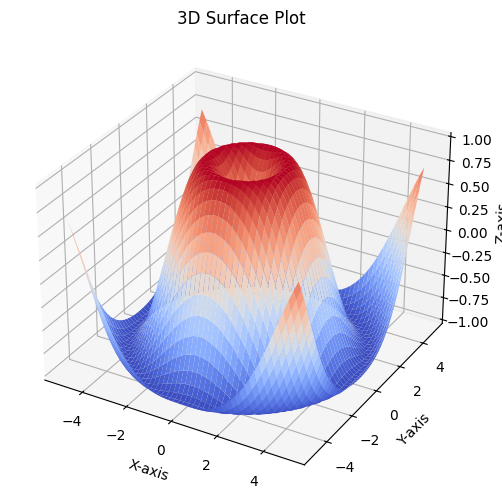

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d') # Enables 3D plotting.

# Plot surface
ax.plot_surface(X, Y, Z, cmap='coolwarm') # Creates a 3D surface.

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Surface Plot")

plt.show()

### (1.3) Plotting Multiple Figures in One Plot

When comparing multiple datasets, it’s useful to plot multiple figures in the same plot using subplots or overlapping plots.

#### (1.3.1) Using subplot for Multiple Plots

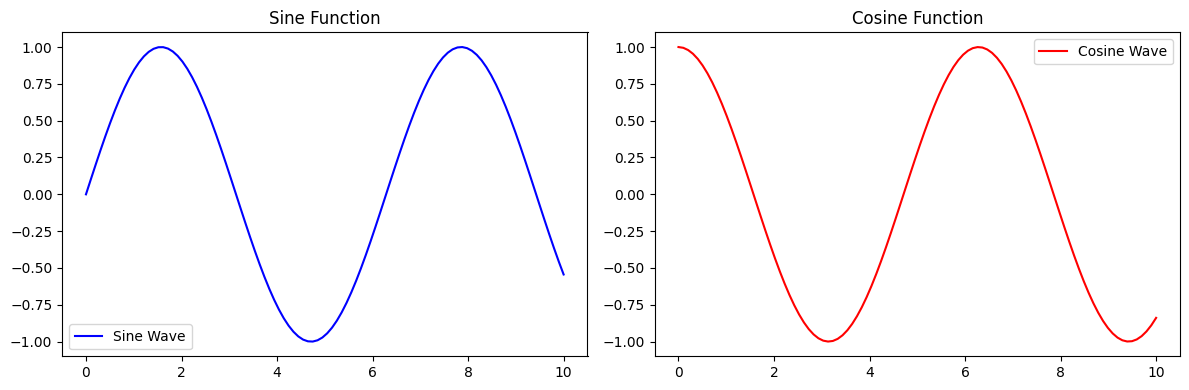

In [ ]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Creates multiple subplots: 2 rows, 1 column

# Plots on each subplot with axes[i].plot()

# First subplot
axes[0].plot(x, y1, label="Sine Wave", color="blue")
axes[0].set_title("Sine Function")
axes[0].legend()

# Second subplot
axes[1].plot(x, y2, label="Cosine Wave", color="red")
axes[1].set_title("Cosine Function")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### (1.3.2) Using subplot for 2D Heatmaps

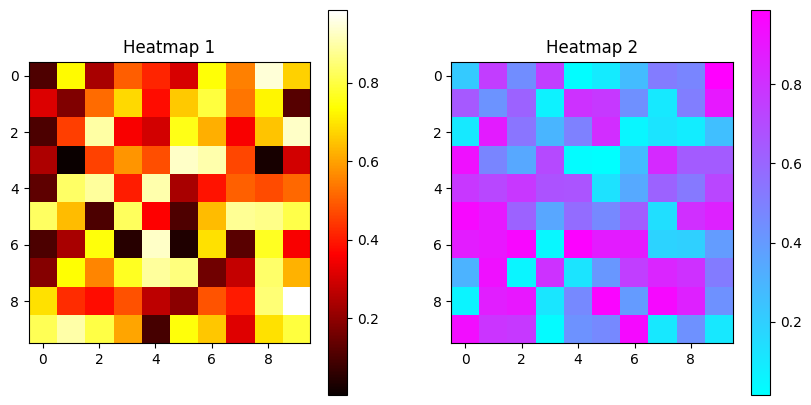

In [ ]:
data1 = np.random.rand(10, 10)
data2 = np.random.rand(10, 10)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First heatmap
im1 = axes[0].imshow(data1, cmap="hot")
plt.colorbar(im1, ax=axes[0])  # Add color bar
axes[0].set_title("Heatmap 1")

# Second heatmap
im2 = axes[1].imshow(data2, cmap="cool")
plt.colorbar(im2, ax=axes[1])
axes[1].set_title("Heatmap 2")

plt.show()

### (1.3) High-Resolution Plot Using griddata

When function values are available only at discrete points, we can use grid interpolation to estimate values on a dense grid for visualization.

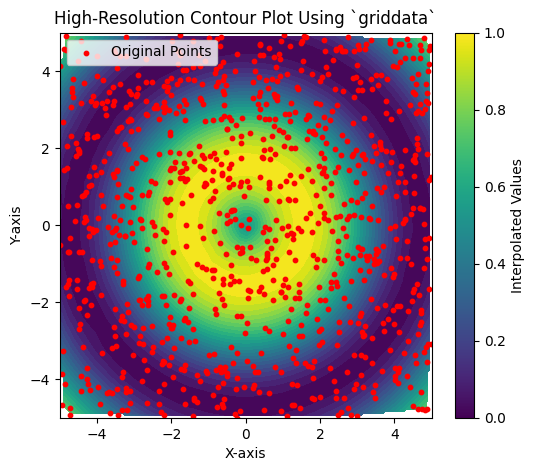

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Step 1: Generate scattered data points
num_points = 1000  # Number of scattered points
x = np.random.uniform(-5, 5, num_points)  # Random x-coordinates
y = np.random.uniform(-5, 5, num_points)  # Random y-coordinates
z = np.sin(np.sqrt(x**2 + y**2))  # Compute function values at scattered points

# Step 2: Create a dense grid for interpolation
grid_x, grid_y = np.mgrid[-5:5:200j, -5:5:200j]  # High-resolution grid

# Step 3: Interpolate using `griddata`
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')  # Cubic interpolation ['nearest', 'linear', 'cubic']

# Step 4: Plot the high-resolution interpolated function
plt.figure(figsize=(6,5))
plt.contourf(grid_x, grid_y, grid_z, levels=30, cmap="viridis")  # Filled contour plot
plt.scatter(x, y, color="red", marker="o", s=10, label="Original Points")  # Show original data points
plt.colorbar(label="Interpolated Values")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("High-Resolution Contour Plot Using `griddata`")
plt.legend()
plt.show()

## (2) Saving and Loading Data

Often, we need to save and load datasets efficiently. Two common libraries for handling scientific data are ```scipy.io``` and ```h5py```.

### (2.1) Saving and Loading ```.mat``` Files with ```scipy.io```
MATLAB ```.mat``` files are commonly used for storing numerical data.

In [ ]:
import os
from scipy.io import savemat, loadmat

# Ensure the folder exists
os.makedirs("data", exist_ok=True)  # Creates 'data' folder if it doesn't exist

# Create a dictionary of arrays
data = {"x": np.array([1, 2, 3]), "y": np.array([4, 5, 6])}

# Save to a .mat file
savemat("data/example.mat", data)

# Load the .mat file
loaded_data = loadmat("data/example.mat")
# print(loaded_data)
for key, value in loaded_data.items():
    print('key:', key, ' | value:', value)

key: __header__  | value: b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Nov 30 01:17:56 2025'
key: __version__  | value: 1.0
key: __globals__  | value: []
key: x  | value: [[1 2 3]]
key: y  | value: [[4 5 6]]


### (2.2) Using ```h5py``` for Large Datasets

HDF5 files (```.h5```) are well-suited for **large datasets**.

The keys: <KeysViewHDF5 ['x', 'y']>
x: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0

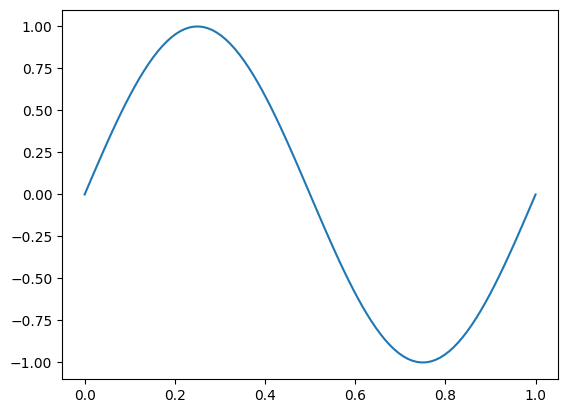

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Create an HDF5 file and save data
with h5py.File("data/example.h5", "w") as f:
    x = np.linspace(0,1, 100)
    y = np.sin(2. * np.pi * x)
    f.create_dataset(name="x", data=x)
    f.create_dataset(name="y", data=y)

# Load data from the HDF5 file
with h5py.File("data/example.h5", "r") as f:
    print('The keys:', f.keys())
    print('x:', f["x"][:])
    print('y:', f["y"][:])
    loaded_x = f["x"][:]
    loaded_y = f["y"][:]
    plt.figure()
    plt.plot(loaded_x, loaded_y)
    plt.show()

## (3) Parsing and Managing Data with ```torch.utils.data```

When working with deep learning models, we often need to process, load, and manage datasets efficiently. PyTorch provides ```torch.utils.data.Dataset``` and ```torch.utils.data.DataLoader``` for this purpose.

### (3.1) Creating a Custom Dataset

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Example usage
data = np.random.rand(100, 10)
labels = np.random.choice([0, 1], size=100)
dataset = CustomDataset(data, labels)

print(len(dataset))  # Output: 100
print(dataset[0])    # Output: (tensor([...]), tensor(0 or 1))

100
(tensor([0.3019, 0.9545, 0.6568, 0.2466, 0.1978, 0.0896, 0.8843, 0.8002, 0.5907,
        0.8100]), tensor(0.))


### (3.2 )Using DataLoader for Batching

Once we have a dataset, we can use DataLoader to create mini-batches for training.

**Key Features**
- ```batch_size```: Number of samples per batch.
- ```shuffle=True```: Randomly shuffles data every epoch.

In [ ]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Iterate through batches
for batch_data, batch_labels in dataloader:
    print('The shape of data batch:', batch_data.shape, 'The shape of label batch:', batch_labels.shape)
    break  # Show the first batch

The shape of data batch: torch.Size([16, 10]) The shape of label batch: torch.Size([16])


## (4) Additional Useful Techniques

These skills are not strictly required but will make working with PyTorch easier.

### (4.1) Handling GPU Computation

Using a GPU accelerates training.

**Note:** Always move models and tensors to the **same device** before training.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(tensor.device)

cpu


### (4.2) Normalizing Data for Faster Training

Normalizing input features can improve model convergence.

In [ ]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
normalized_data = (data - mean) / std
print(normalized_data.shape)

(100, 10)


In PyTorch, you can normalize tensors with:

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Normalize(mean=[0.5], std=[0.5])  # Example for 1D data

### (4.3) Saving and Loading PyTorch Models
**Note:** Saving models allows you to resume training or deploy them.

In [ ]:
import torch.nn as nn

# Ensure directory exists
os.makedirs("model", exist_ok=True)

# Define a simple model
model = nn.Linear(10, 1)

# Save model
torch.save(model.state_dict(), "model/example.pth")

# Load model
model.load_state_dict(torch.load("model/example.pth"))
model.eval()

Linear(in_features=10, out_features=1, bias=True)

### (4.4) Logging Training Progress

Use ```tqdm``` to display a progress bar.

In [ ]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    pass  # Simulating training iterations

100%|██████████| 1000/1000 [00:00<00:00, 2995931.43it/s]


## Summary
|Topic|Skills Learned|
|---|---|
|**Matplotlib**| Plotting line graphs, scatter plots, histograms, and images|
|**Saving/Loading Data**| Using ```scipy.io``` for ```.mat``` files, ```h5py``` for ```.h5``` files|
|**Data Handling in PyTorch**| Creating custom datasets with ```Dataset```, batching with ```DataLoader```|
|**Additional Skills**|GPU acceleration, normalization, saving/loading models, progress logging|


## Exercises
#### **Exercise 1: Basic Plotting with Matplotlib**
Write a Python script to:
- Generate 100 random points $(x, y)$ in the range [-10, 10].
- Compute function values using $f(x, y) = \sin(x) \cos(y)$.
- Create a **scatter plot** where:
    - Points are colored based on function values.
    - A color bar is added.
- Label the axes and add a title.

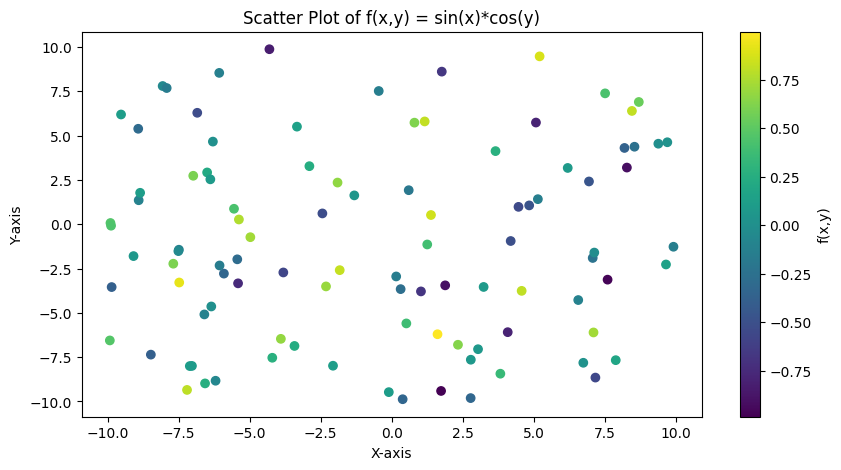

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random points
x = np.random.uniform(-10, 10, 100)
y = np.random.uniform(-10, 10, 100)

# Compute function values
z = np.sin(x) * np.cos(y)

# Create scatter plot with color based on z
plt.figure(figsize=(10,5))
scatter = plt.scatter(x, y, c=z, cmap='viridis')  # c=z colors points
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of f(x,y) = sin(x)*cos(y)")
plt.colorbar(scatter, label='f(x,y)')
plt.show()

#### **Exercise 2: Multiple Subplots in One Figure**
Write a Python script that:
- Generates 100 random points $(x, y)$ in [-5, 5].
- Computes function values for two functions:
    - $z_1 = \sin(xy)$
    - $z_2 = e^{-x^2 - y^2}$
- Uses ```plt.subplots()``` to create a 1×2 subplot layout:
    - The first subplot shows a ```scatter``` plot of $z_1$.
    - The second subplot shows a ```contourf``` plot of $z_2$.
- Ensures clear labels, titles, and a shared color bar.

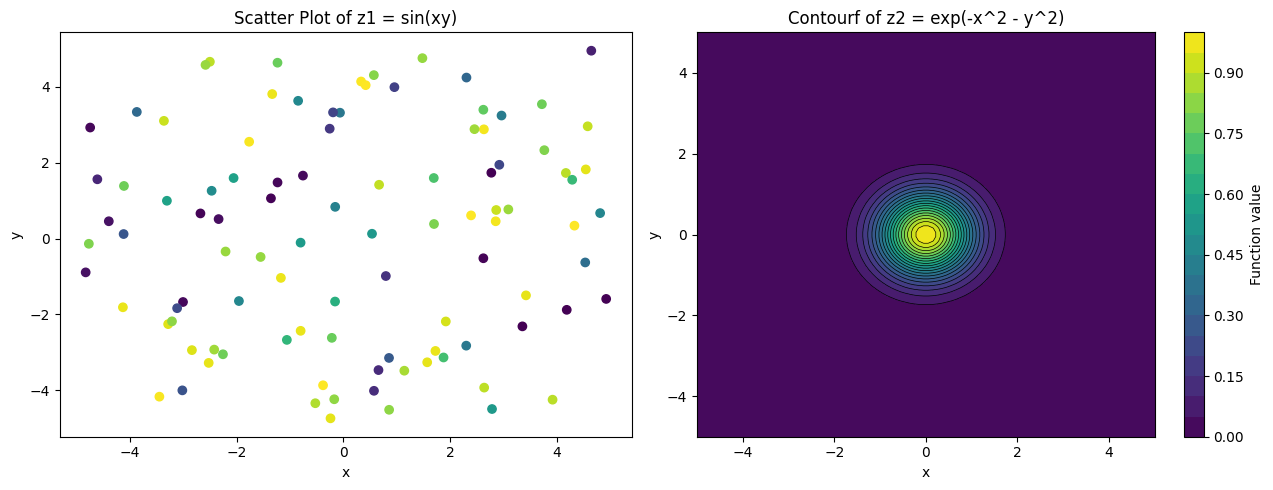

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random points
x = np.random.uniform(-5, 5, 100)
y = np.random.uniform(-5, 5, 100)

# Compute z1 for scatter plot
z1 = np.sin(x * y)

# Create a grid for z2 contour plot
x_grid = np.linspace(-5, 5, 100)
y_grid = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z2 = np.exp(-X**2 - Y**2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# First subplot: scatter plot of z1
sc = axes[0].scatter(x, y, c=z1, cmap='viridis')
axes[0].set_title("Scatter Plot of z1 = sin(xy)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

# Second subplot: contourf plot of z2
cf = axes[1].contourf(X, Y, Z2, levels=20, cmap='viridis')
axes[1].contour(X, Y, Z2, levels=20, colors='black', linewidths=0.5)
axes[1].set_title("Contourf of z2 = exp(-x^2 - y^2)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")

# Shared color bar
fig.colorbar(cf, ax=axes[1], orientation='vertical', label='Function value')

plt.tight_layout()
plt.show()

#### Exercise 3: Saving and Loading Data with ```scipy.io``` and ```h5py```
- Generate an array of 500 random numbers following a normal distribution.
- Save this data into a MAT file (.mat) using ```scipy.io.savemat()```.
- Load the data back and print the first 10 values.
- Save this data into a h5 file (.h5) using ```h5py```.
- Load the data back and print the first 10 values.


First 10 values from .mat file:
[ 1.00919506  1.31857918 -0.72560606  0.46352509 -0.4446977  -0.48617657
 -0.85525289 -0.80530031  1.48911543  0.95906745]

HDF5 file keys: ['dataset']
First 10 values from .h5 file:
[ 1.00919506  1.31857918 -0.72560606  0.46352509 -0.4446977  -0.48617657
 -0.85525289 -0.80530031  1.48911543  0.95906745]


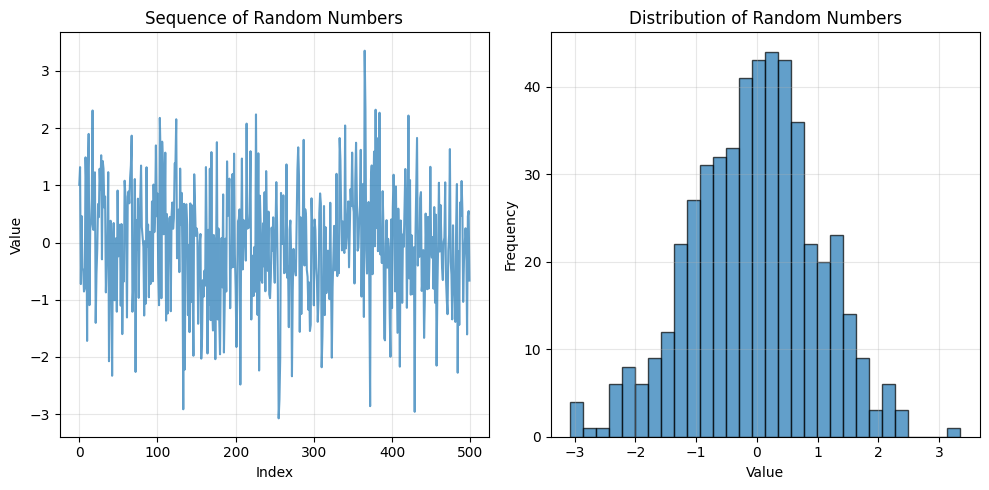

In [ ]:
from scipy.io import savemat, loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure the folder exists
os.makedirs("data", exist_ok=True)

# Generate 500 random numbers from a standard normal distribution (mean=0, std=1)
rand_num = np.random.randn(500)

# Save to a .mat file
data = {"data": rand_num}
savemat("data/example.mat", data)

# Load the .mat file
loaded_data = loadmat("data/example.mat")
print("First 10 values from .mat file:")
print(loaded_data['data'].flatten()[:10]) # flatten() makes a 1D array

# Create an HDF5 file and save data
with h5py.File("data/example.h5", "w") as f:
    f.create_dataset("dataset", data=rand_num)

# Load data from the HDF5 file
with h5py.File("data/example.h5", "r") as f:
    print("\nHDF5 file keys:", list(f.keys()))
    loaded_h5 = f["dataset"][:]
    print("First 10 values from .h5 file:")
    print(loaded_h5[:10])

# Visualize the loaded data
plt.figure(figsize=(10, 5))

# Subplot 1: Sequence
plt.subplot(1, 2, 1)
plt.plot(loaded_h5, alpha=0.7)
plt.title("Sequence of Random Numbers")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True, alpha=0.3)

# Subplot 2: Histogram (distribution)
plt.subplot(1, 2, 2)
plt.hist(loaded_h5, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Random Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Exercise 4: Using ```torch.utils.data``` for Data Handling
- Generate 200 samples with two features:
    - $x_1$ from a uniform distribution in [0, 1].
    - $x_2$ from a normal distribution with mean 0, std 1.
- Define a dataset class using ```torch.utils.data.Dataset``` that:
    - Stores $x_1, x_2$, and computes $y = x_1^2 + \sin(x_2)$.
    - Implements ```__len__``` and ```__getitem__```.
- Use ```DataLoader``` to create **batches of size 10**, then print one batch.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CalcDataset(Dataset):
    """
    Custom dataset:
    x1 ~ Uniform(0,1)
    x2 ~ Normal(0,1)
    y = x1^2 + sin(x2)
    """
    def __init__(self, num_samples=200):
        self.num_samples = num_samples

        # Generate features
        self.x1 = torch.rand(num_samples) # uniform distribution in [0, 1)
        self.x2 = torch.randn(num_samples) # standard normal distribution (mean=0, std=1)

        # Compute target
        self.y = self.x1**2 + torch.sin(self.x2)

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        # Return (features, target)
        features = torch.tensor([self.x1[idx], self.x2[idx]])
        target = self.y[idx]
        return features, target


# Create dataset
dataset = CalcDataset()

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Print one batch
for batch_x, batch_y in dataloader:
    print("X batch shape:", batch_x.shape)  # (10,2)
    print("y batch shape:", batch_y.shape)  # (10,)
    print("\nFirst batch of X:\n", batch_x)
    print("\nFirst batch of y:\n", batch_y)
    break  # only show one batch


X batch shape: torch.Size([10, 2])
y batch shape: torch.Size([10])

First batch of X:
 tensor([[ 0.8634,  1.5950],
        [ 0.9822,  1.5644],
        [ 0.0185, -2.1334],
        [ 0.4233,  0.5293],
        [ 0.8009,  0.0910],
        [ 0.7890, -0.9916],
        [ 0.0852,  0.0685],
        [ 0.5184, -0.7869],
        [ 0.4196, -1.1846],
        [ 0.1789, -2.4994]])

First batch of y:
 tensor([ 1.7452,  1.9647, -0.8455,  0.6841,  0.7323, -0.2144,  0.0757, -0.4394,
        -0.7503, -0.5669])


#### Exercise 5: High-Resolution Contour Plot Using ```griddata```
- Generate 500 random points in the range [-3, 3] × [-3, 3].
- Compute function values using $f(x,y) = \cos(\sqrt{x^2 + y^2})$.
- Use ```griddata``` to interpolate onto a **dense grid** (200×200 resolution).
- Create a ```contourf``` plot of the interpolated function.
- Overlay the original scattered points on the plot.

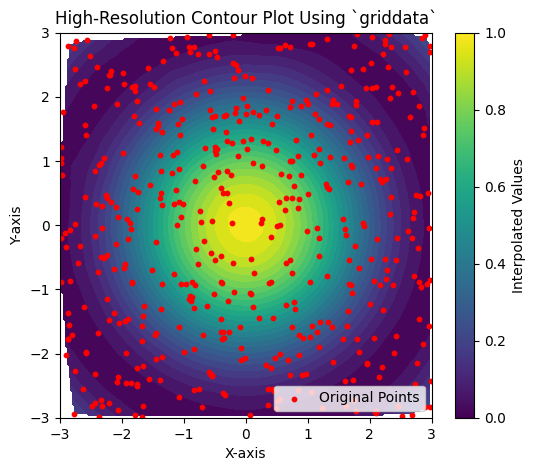

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Generate 500 random points in the range [-3, 3] × [-3, 3]
num_points = 500
x = np.random.uniform(-3, 3, num_points)
y = np.random.uniform(-3, 3, num_points)

# Compute function values
z = np.cos(np.sqrt(x**2 + y**2))

# Create a dense grid for interpolation
grid_x, grid_y = np.mgrid[-3:3:200j, -3:3:200j]

# Interpolate using `griddata`
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')  # Cubic interpolation ['nearest', 'linear', 'cubic']

# Plot the high-resolution interpolated function
plt.figure(figsize=(6,5))
plt.contourf(grid_x, grid_y, grid_z, levels=30, cmap="viridis")  # Filled contour plot
plt.scatter(x, y, color="red", marker="o", s=10, label="Original Points")  # Show original data points
plt.colorbar(label="Interpolated Values")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("High-Resolution Contour Plot Using `griddata`")
plt.legend()
plt.show()